In [1]:
import pandas as pd

data = pd.read_csv('iris.csv', names=['sepal length', 'sepal width', 'petal length',
                                     'petal width', 'target'])
data.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
from sklearn.preprocessing import StandardScaler

features = ['sepal length', 'sepal width', 'petal length', 'petal width']

x = data.loc[:, features].values
y = data.loc[:, ['target']].values

x = StandardScaler().fit_transform(x)

x[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)
principalData = pd.DataFrame(data=principalComponents,
                            columns=['pc1', 'pc2'])
principalData.head()

,pc1,pc2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [4]:
finalData = pd.concat([principalData,data[['target']]], axis=1)
finalData.head()

,pc1,pc2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


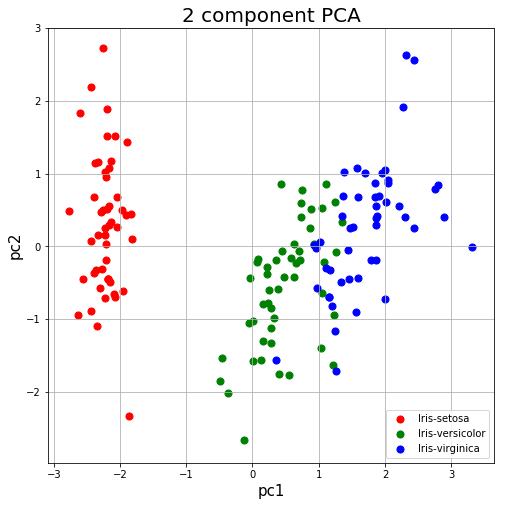

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('pc1', fontsize=15)
ax.set_ylabel('pc2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indiciesToKeep = finalData['target'] == target
    ax.scatter(finalData.loc[indiciesToKeep, 'pc1'],
              finalData.loc[indiciesToKeep, 'pc2'], c=color, s=50)
ax.legend(targets)
ax.grid()

In [6]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [11]:
pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577]])

In [8]:
from statsmodels.multivariate.pca import PCA

pc = PCA(x, ncomp=2)
pc.eigenvals

array([436.62271256, 138.18313961])

In [9]:
pc.eigenvecs

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

In [10]:
pc.loadings

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])